<a href="https://colab.research.google.com/github/elainefabiola/3Ddata_data_science/blob/master/Analisando_os_Dados_do_Airbnb_Santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a parti do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixada apenas o seguinte arquivo:

*   listings.cvc - Summary information and metric for listing in Santiago.


In [2]:
# importar os pacotes necessarios - dados estruturados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Análise dos Dados do Airbnb - * Santiago

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

O Airbnb afirma fazer parte da **economia compartilhada** e atrapalha a indústria hoteleira. No entanto, os dados mostram que a maioria das listagens do Airbnb na maioria das cidades são casas inteiras, muitas das quais são alugadas o ano todo.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires , e ver quais insights podem ser extraídos a partir de dados brutos. neste perido que está com problema Coronavírus **

** Santiago, capital e maior cidade do Chile, fica em um vale circundado pelos Andes cobertos pela neve e a cadeia de montanhas chilena.**

In [3]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2019-03-15/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* **id** - número de id gerado para identificar o imóvel
* **name** - nome da propriedade anunciada.
* **host_id** - número de id do proprietário (anfitrião) da propriedade
* **host_name** - nome do anfitrião
* **neighbourhood_group** - esta coluna não contém nenhum valor válido
* **neighbourhood** - nome do bairro
* **latitude** coordenada da latitude da propriedade
* **longitude** coordenada da longitude da propriedade
* **room_type** informa o tipo de quarto que é oferecido
* **room_type** preço para aluguer o imóvel Peso chileno
* **minimum_nights** quantidade minima de noite para reservar
* **number_of_reviews** número de reviews que a propriedade possui
* **last_review** data do último review
* **reviews_per_month** quantidade de review por mês
* **calculated_host_listings_count** quantidade de imóveis do mesmo anfitrião
* **availability_365** número de dias de disponibilidade dentro de 365 dias.   



Antes de iniciar qualquer análise, vamos verificar o nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# Para visualizar sucintamente as primeiras linhas de um DataFrame vamos utilizar o método .head()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14576,Dp Valen Castillo 1600,14972,Bruno,NaN,Santiago,-33.46413,-70.64869,Entire home/apt,67025,5,0,NaN,NaN,1,363
1,34552,Big nd nice room + private bathroom,149223,Gladys,NaN,Santiago,-33.46354,-70.64851,Private room,32172,3,0,NaN,NaN,1,365
2,47936,My Flat in English,218471,Nelsk,NaN,Santiago,-33.44791,-70.63547,Private room,36864,1,0,NaN,NaN,1,365
3,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,36864,3,0,NaN,NaN,3,178
4,50466,Great apartment at a great location,231631,Marco,NaN,Santiago,-33.43630,-70.65390,Entire home/apt,56971,1,0,NaN,NaN,1,365


### **Q1. Quantos atributos e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print ("Entrada:\t {}".format(df.shape[0]))
print ("Atributos descritos:\t {}\n".format(df.shape[1]))
# verificar de tipos de atributos da entradas do dataset
display(df.dtypes)


Entrada:	 15790
Atributos descritos:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Isso ocorre bastante por erros na hora da inserção, dados não preenchidos, problemas na exportação e etc.


*   É possivél ver qua o atribustos descritivo **reviews_per_month** possui 100% dos sues valores faltando.
*   Os atribustos descritivos **reviews_per_month** e **last_review** possuem valores nulos quase medate das linhas.
*   O atribustos descritivos **name** e **host_name** têm menos de 0,1% dos valores nulos.



In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending =False)

neighbourhood_group               1.000000
reviews_per_month                 0.437619
last_review                       0.437619
name                              0.000887
host_name                         0.000317
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição dos atributos, iremos plotar o histograma.

**Histograma** é a representação gráfica da distribuição de frenquência.

Um histograma é construído alocando as faixas no  eixo horizontal , e as frequência (absoluta ou relativa, acumulada ou não), no eixo vertical. Para cada faixa , é atribuido uma barra , de forma que sua altura represente a frequência da faixa. Na prática a quantidade de faixa é um número aproximado igual à raiz quadrada do tamanho do conjunto de valores. 

**K= √número de dados (N)**



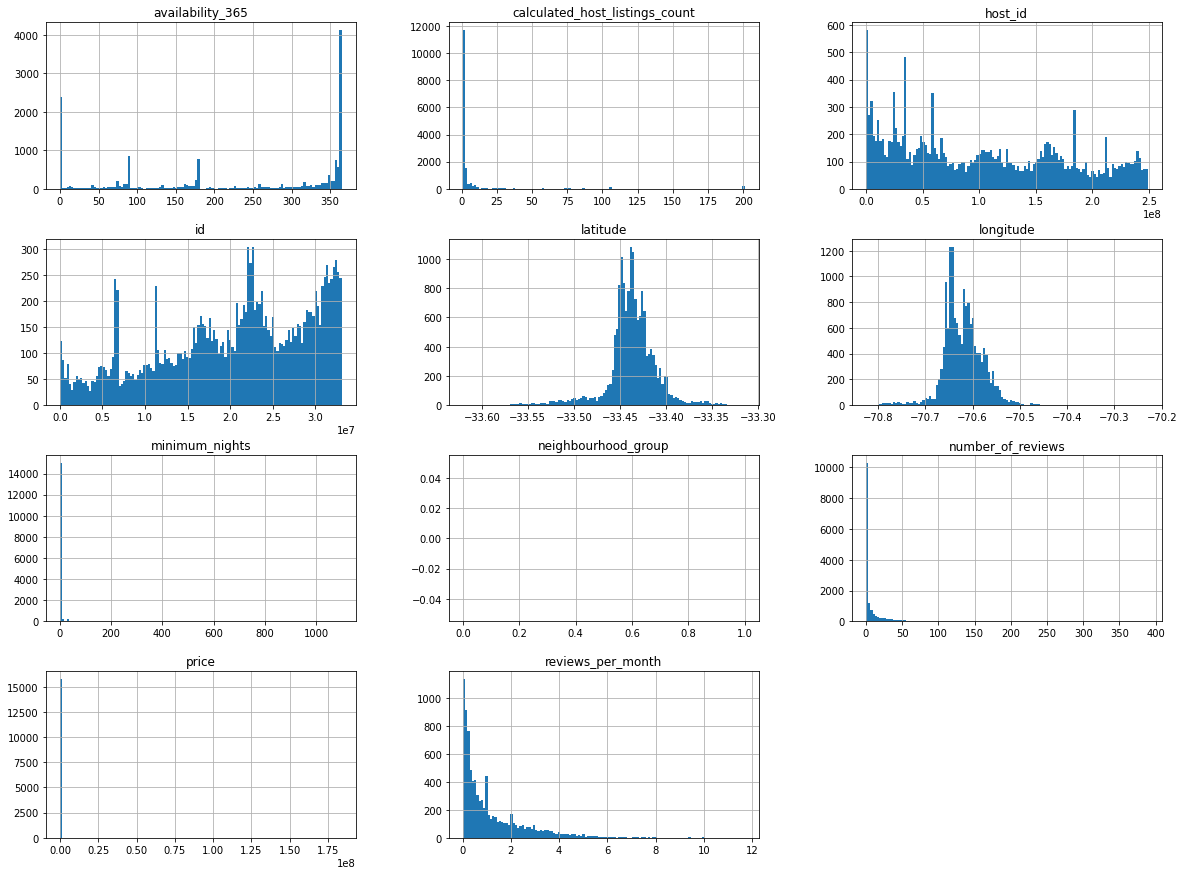

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=125,figsize=(20,15));

### **Q4. Qual a média dos preços de aluguel?**

Pela distribuição do histograma , é possível  verificar indícios da presença de outiliers. Para isso vamos usar **método describe( )**


In [8]:
# ver resumo estatístico das variáveis numericas
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.579000e+04,15790.000000,15790.000000,8880.000000,15790.000000,15790.000000
mean,7.127307e+04,5.084864,10.664725,1.219730,7.512730,225.009246
std,1.574417e+06,29.440156,25.302336,1.435516,26.243083,143.189742
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.876700e+04,1.000000,0.000000,0.220000,1.000000,88.000000
50%,3.016100e+04,2.000000,1.000000,0.660000,1.000000,287.000000
75%,4.021500e+04,3.000000,8.000000,1.752500,3.000000,363.000000
max,1.838887e+08,1100.000000,389.000000,11.700000,201.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

    A variável price possui valor méda  do valor 71.273 pesso chileno , porém seu valor máximo é 131727.

Boxplot para price
**bold text**
**Boxplot** ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados.

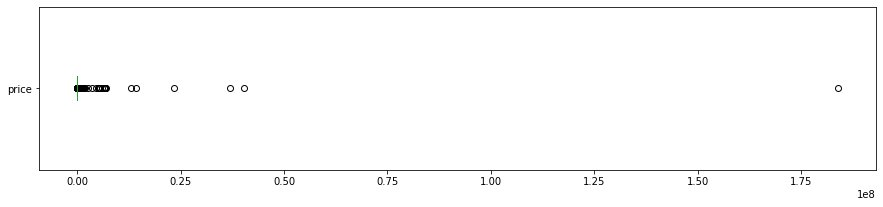


price: valores acima de 71000
1104 entradas
6.9918%


In [14]:
# price
df.price.plot(kind = 'box', vert = False, figsize = [15,3],);
plt.show();

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 71000")
print("{} entradas".format(len(df[df.price > 71000])))
print("{:.4f}%".format((len(df[df.price > 71000]) / df.shape[0])*100))





**Histogramas sem outliers**

Já que identificamos outliers nas variável price, vamos agora limpar o DataFrame delas e plotar novamente o histograma.


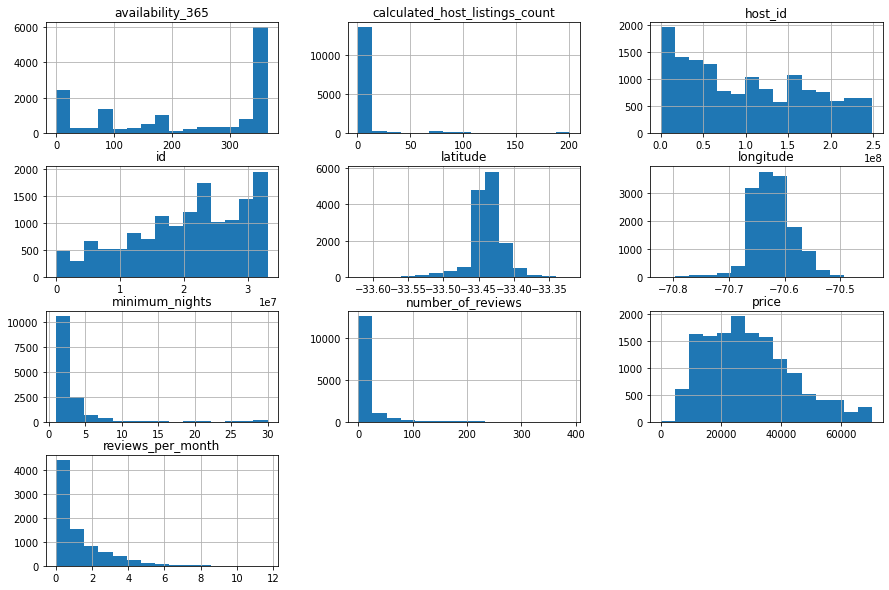

In [23]:
#remove os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 71000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));






### **Q4. Qual a correlação existente entre as variáveis**

In [27]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.043900,0.026733,-0.004703,0.081355,0.097225
minimum_nights,-0.043900,1.000000,-0.033986,-0.100471,-0.044378,-0.020915
number_of_reviews,0.026733,-0.033986,1.000000,0.617522,-0.017241,0.020720
reviews_per_month,-0.004703,-0.100471,0.617522,1.000000,-0.006454,0.001134
calculated_host_listings_count,0.081355,-0.044378,-0.017241,-0.006454,1.000000,0.180715
availability_365,0.097225,-0.020915,0.020720,0.001134,0.180715,1.000000


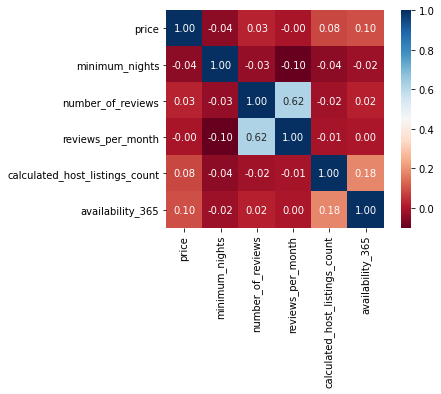

In [29]:
#Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()


Entire home/apt    7829
Private room       6301
Shared room         360
Name: room_type, dtype: int64

In [32]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.540304
Private room       0.434852
Shared room        0.024845
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [33]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Las Condes      35706.807205
Lo Barnechea    35593.600000
Vitacura        34515.613208
Lo Espejo       33646.400000
Providencia     32280.581241
Lo Prado        28527.437500
Pudahuel        28166.658537
Recoleta        28121.778409
Santiago        27957.651281
Quilicura       27643.609756
Name: price, dtype: float64

In [35]:
# ver quantidade de imóveis no Las Condes
print(df_clean[df_clean.neighbourhood == "Las Condes"].shape)

(2054, 15)


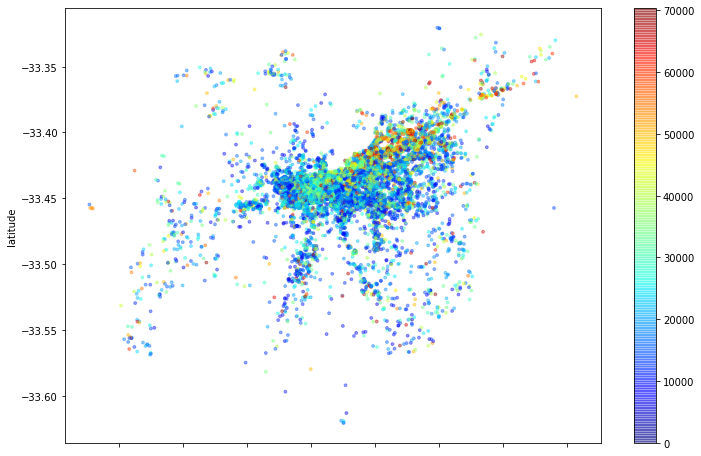

In [34]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));
              


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [36]:
# ver a média da coluna `minimum_nights``

df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,14490.000000,14490.000000,14490.000000,8341.000000,14490.000000,14490.000000
mean,29482.844237,2.698137,11.067426,1.245740,7.951622,224.048033
std,14559.257647,4.122826,25.860687,1.456401,27.318257,143.144771
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,18097.000000,1.000000,0.000000,0.220000,1.000000,88.000000
50%,28150.000000,2.000000,1.000000,0.680000,1.000000,286.000000
75%,38874.000000,3.000000,8.000000,1.820000,3.000000,363.000000
max,70376.000000,30.000000,389.000000,11.700000,201.000000,365.000000


## Conclusões
